 

# Project: Investigate a Dataset No-show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.
I am gonna invistigate on a collection of data about if the patients attende the appointment or no 
I will try to understand whos is responsible for abcence the patients or doctors or the hospital 
here some question that I will answert it through my investigate :
-IS the Hyper_tension,Alcoholism,Diabetes affect on the attendence to the appointment? !
-Is sending message SMS affects on the attendance?
-IS the Age affect on the attendence to the appointment? 



In [59]:
 
#import important package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
 

 

 
 

 


<a id='wrangling'></a>
## Data Wrangling

 here clean the data to be ready for the next stage

### General Properties

In [60]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv(r'C:\Users\Jawaher\Desktop\DA\data1.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 

### Data Cleaning (search for null or duplicated values and fix data type  and rename if it necceary)

In [61]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.isnull().any(axis=1).sum()
# here to see if there is a missing data as we see nothing (0)


0

In [62]:
df.duplicated().sum()
#to see if there is a duplicated values in the DS 
#there is no duplicated values

0

In [63]:
MAge=df['Age'].mean()
df[df['Age'] <= 0] =MAge
#look for values with negative and change it to the mean of age

In [64]:
#rename columns with more specific names 
df.rename(columns = {'Hipertension': 'Hyper_tension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)


In [65]:
#fix the type of data 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [66]:
#change the vlues of yes and no to make it more practical to work on the data 
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

C:\Users\Jawaher\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jawaher\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
# create a mask for people who came
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null float64
Hyper_tension     110527 non-null float64
Diabetes          110527 non-null float64
Alcoholism        110527 non-null float64
Handicap          110527 non-null float64
SMS_received      110527 non-null float64
No_show           110527 non-null float64
showed            110527 non-null bool
not_showed        110527 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(10), object(2)
memory usage: 12.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis
here to anwer the question that i posted in the inroductions 
### Research Question 1(IS the Hyper_tension,Alcoholism,Diabetes affect on the attendence to the appointment? !)

In [108]:
columns = ['Hyper_tension','Alcoholism','Diabetes']
for r in columns :
    print(df.groupby(r)['No_show'].mean())
  # use groupby and loop to get the mean of 'Hyper_tension','Alcoholism' and 'Diabetes
# as we see the percentage of showed or not is close so they did not affect will
   

Hyper_tension
0.000000      0.210222
1.000000      0.173020
37.088874    37.088874
Name: No_show, dtype: float64
Alcoholism
0.000000      0.202679
1.000000      0.201488
37.088874    37.088874
Name: No_show, dtype: float64
Diabetes
0.000000      0.204455
1.000000      0.180033
37.088874    37.088874
Name: No_show, dtype: float64


### Research Question 2(Do the sending of message affect on  the attendence to the appointment?)

SMS_received
0.000000     0.832712
1.000000     0.723348
37.088874    0.000000
Name: showed, dtype: float64


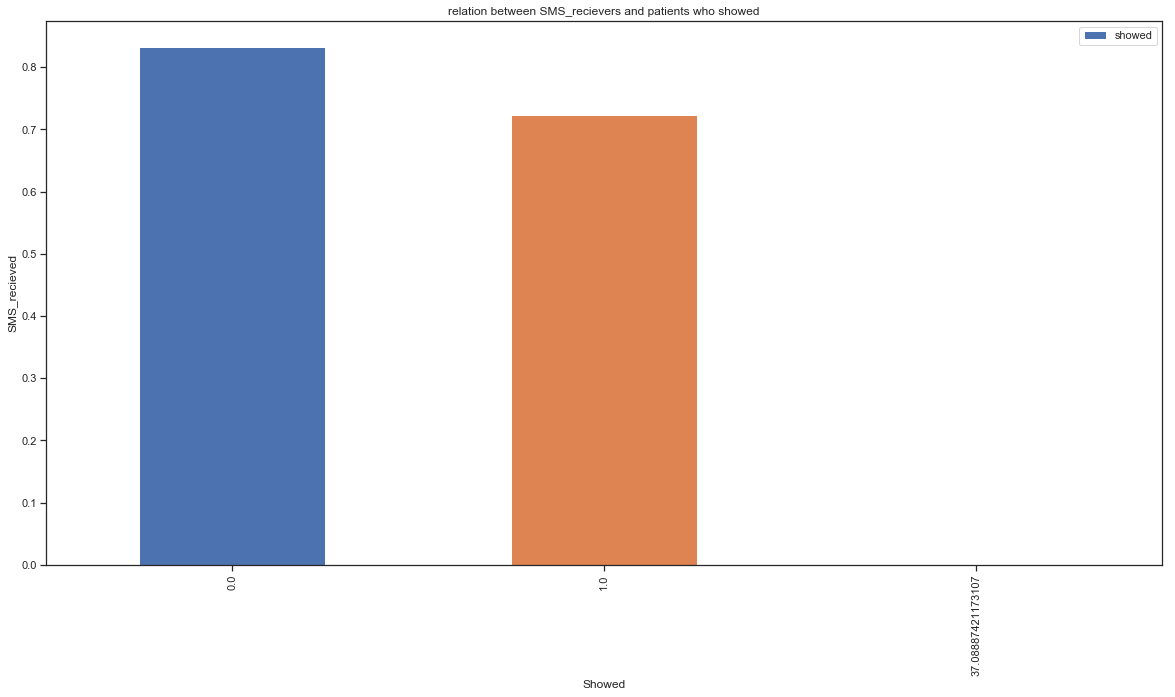

In [104]:
 
print(df.groupby('SMS_received')['showed'].mean())
df.groupby('SMS_received')['showed'].mean().plot(kind='bar',figsize=(20,10));
plt.xlabel("Showed")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who showed")
plt.legend()
#i used groupby  between 'SMS_received''showed' to see if sending message affect on the patient to come or not 
# use plot of type bar to get visiulate
#sending message it is not an important factor that affect on the patient to come
 

### Research Question3 (are there a relationship between gender and attendence to the appointment?)

Gender
37.08887421173107    0.000000
F                    0.796415
M                    0.799154
Name: showed, dtype: float64


Text(0.5,1,'relation between Gender and patients who showed')

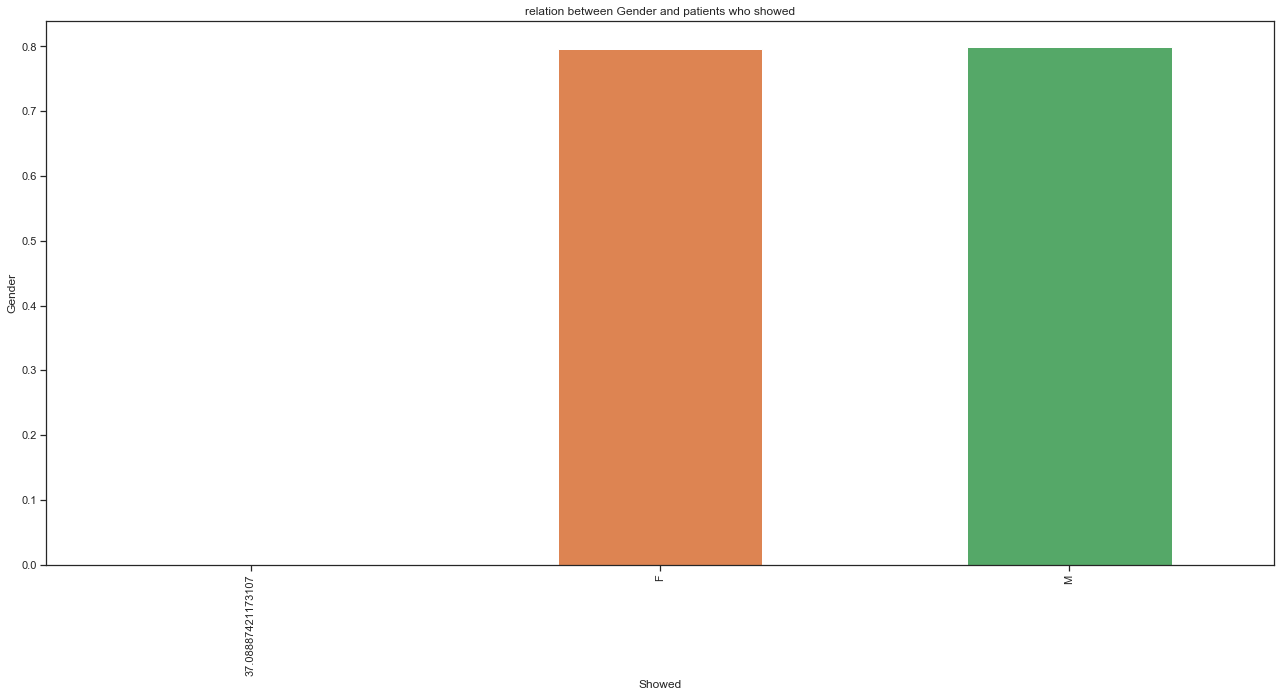

In [115]:
print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed")
#i used groupby  between 'Gender''showed' to see if sending message affect on the patient to come or not 
# use plot of type pie to get visiulate 
#gender also did nt affect!!

### Research Question( IS there a relationship between Age and attendence to the appointment?)

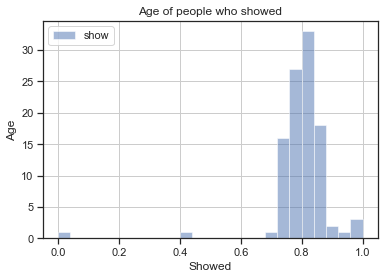

In [109]:
df.groupby('Age')['showed'].mean().hist(alpha=0.5,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()
#i used groupby  between 'Age''showed' to see if sending message affect on the patient to come or not 
# use hist of type bar to get visiulate
#age the most factor affect age between 15 and 30 attendence more than others 

## Limmitions 
0 or negatives values on the age 



<a id='conclusions'></a>
## Conclusions

 from the the result sending SMS message did nof affect on the attendence to the appointments,the women have appointments more than the men
 the factors like  gender or Hyper_tension,Alcoholism,Diabetes also did not affect on the attendence to the appointments,
 most of patients did show to thier appointment!! the most factor affect it is the age
 
 Sources:
 https://www.youtube.com/watch?v=qy0fDqoMJx8
 https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
 https://www.pdfdrive.com/python-for-data-analysis-e18892431.html
 